<a href="https://colab.research.google.com/github/G-Shino/colab_tutorial/blob/master/%E7%94%BB%E5%83%8F%E5%87%A6%E7%90%86100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 必要な画像のダウンロード

In [11]:
!wget https://raw.githubusercontent.com/yoyoyo-yo/Gasyori100knock/master/Question_01_10/imori.jpg

--2019-06-09 07:13:36--  https://raw.githubusercontent.com/yoyoyo-yo/Gasyori100knock/master/Question_01_10/imori.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12638 (12K) [image/jpeg]
Saving to: ‘imori.jpg.1’

imori.jpg.1         100%[===================>]  12.34K  --.-KB/s    in 0s      

2019-06-09 07:13:36 (139 MB/s) - ‘imori.jpg.1’ saved [12638/12638]



In [12]:
!wget https://github.com/yoyoyo-yo/Gasyori100knock/raw/master/Question_01_10/imori_noise.jpg

--2019-06-09 07:13:37--  https://github.com/yoyoyo-yo/Gasyori100knock/raw/master/Question_01_10/imori_noise.jpg
Resolving github.com (github.com)... 192.30.253.113
Connecting to github.com (github.com)|192.30.253.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/yoyoyo-yo/Gasyori100knock/master/Question_01_10/imori_noise.jpg [following]
--2019-06-09 07:13:38--  https://raw.githubusercontent.com/yoyoyo-yo/Gasyori100knock/master/Question_01_10/imori_noise.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14696 (14K) [image/jpeg]
Saving to: ‘imori_noise.jpg.1’

imori_noise.jpg.1   100%[===================>]  14.35K  --.-KB/s    in 0.007s  

2019-06-09 07:13:38 (2.14 MB/s) - ‘imori_noise.jpg.1’ save

# 画像の表示について
- 基本的にjupyternotebook系はcv2.imshowに対応していない。kernelがクラッシュするので。
- ただgoogleさんはパッチをくれる
- けど、今回はplt.imshow()を使用していく

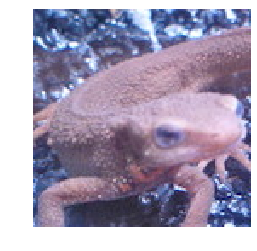

In [13]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("imori.jpg")

#cv2上だとBGRだがimshow(plt系)ではRGBの順である必要がある
plt.axis('off')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) 
plt.show()

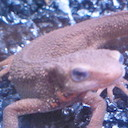

In [14]:
#googleのパッチ
from google.colab.patches import cv2_imshow
cv2_imshow(img)

In [0]:
#本来の手順
# cv2.imwrite("result.jpg", out)
# cv2.imshow("result", out)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

# 01～10

## 01. チャネル入れ替え
画像を読み込み、RGBをBGRの順に入れ替えよ。
 cv2.imread()関数ではチャネルがBGRの順になることに注意！ 

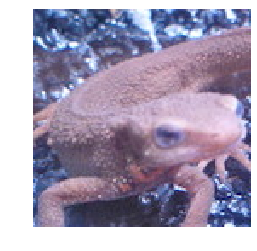

In [16]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("imori.jpg")

#cv2上だとBGRだがimshow(plt系)ではRGBの順である必要がある
plt.axis('off')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) 
plt.show()

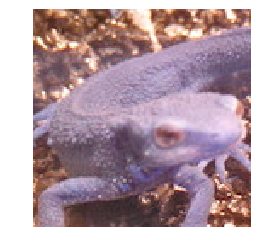

In [17]:
 img = cv2.imread("imori.jpg")

b = img[:, :, 0].copy()
g = img[:, :, 1].copy()
r = img[:, :, 2].copy()

# RGB > BGR
img[:, :, 0] = r
img[:, :, 1] = g
img[:, :, 2] = b

plt.axis("off")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

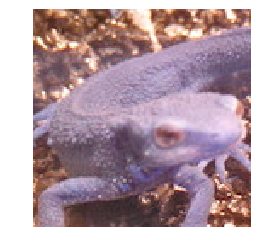

In [18]:
#モジュールを用いると
%matplotlib inline
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("imori.jpg")

#並び順を直さなければ、BGR表示
plt.axis('off')
plt.imshow(img) 
plt.show()

## 02. グレースケール化
画像をグレースケールにせよ。 グレースケールとは、画像の輝度表現方法の一種であり下式で計算される。

Y = 0.2126 R + 0.7152 G + 0.0722 B

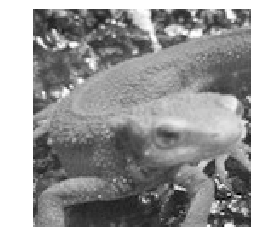

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np

img = cv2.imread("imori.jpg")
b = img[:, :, 0].copy()
g = img[:, :, 1].copy()
r = img[:, :, 2].copy()

y = 0.2126 * r + 0.7152 * g + 0.0722 * b #なおcv2で表示したい場合はunit8に直す必要がある e.g.)out = out.astype(np.uint8)
#uint8であれば[0, 255]、uint16は[0, 65535]、int16は[-32768, 32767]、floatであれば[0.0, 1.0]となっている
plt.imshow(y, cmap="gray")
plt.axis("off")
plt.show()

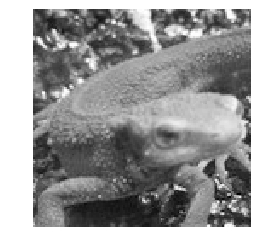

In [20]:
#モジュールを用いると
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np

img = cv2.imread("imori.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

plt.imshow(gray, cmap="gray")
plt.axis("off")
plt.show()

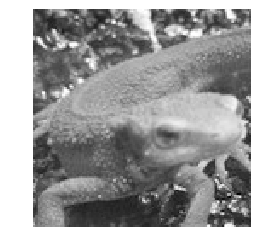

In [21]:
#読み込みからグレーにする方法もある
img = cv2.imread("imori.jpg", 0)
plt.imshow(img, cmap="gray")
plt.axis("off")
plt.show()

## 03. 二値化
画像を二値化せよ。 二値化とは、画像を黒と白の二値で表現する方法である。 ここでは、グレースケールにおいて閾値を128に設定し、下式で二値化する。

```
y = { 0 (if y < 128)
     255 (else)}
```



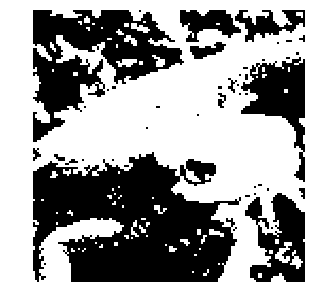

In [22]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2

thresh = 128
img = cv2.imread("imori.jpg", 0)
img[img < thresh] = 0
img[img >= thresh] = 255

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.imshow(img, cmap="gray")
ax.axis("off")
fig.show()


thresh: 128.0


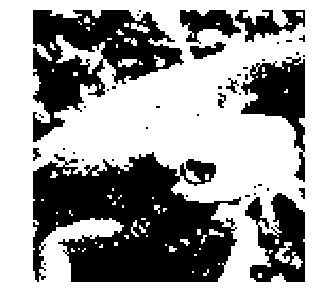

In [23]:
#モジュールと使用
img_gray = cv2.imread("imori.jpg", 0)
thresh = 128
max_pixel = img_gray.max()

thresh, img_bin = cv2.threshold(img_gray,
                             thresh,
                             max_pixel, #二値化したときの最大値
                             cv2.THRESH_BINARY) #二値化の手法

print("thresh:", thresh)
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.imshow(img_bin, cmap="gray")
ax.axis("off")
fig.show()

## 04. 大津の二値化
大津の二値化を実装せよ。 大津の二値化とは判別分析法と呼ばれ、二値化における分離の閾値を自動決定する手法である。 これはクラス内分散とクラス間分散の比から計算される。
双峰性を持つ画像に強い

- 閾値t未満をクラス0, t以上をクラス1とする。
- w0, w1 ... 閾値tにより分離された各クラスの画素数の割合 (w0 + w1 = 1を満たす)
- S0^2, S1^2 ... 各クラスの画素値の分散
- M0, M1 ... 各クラスの画素値の平均値
とすると、

```
クラス内分散 Sw^2 = w0 * S0^2 + w1 * S1^2
クラス間分散 Sb^2 = w0 * (M0 - Mt)^2 + w1 * (M1 - Mt)^2 = w0 * w1 * (M0 - M1) ^2
画像全体の画素の分散 St^2 = Sw^2 + Sb^2 = (const)
以上より、分離度は次式で定義される。
分離度 X = Sb^2 / Sw^2 = Sb^2 / (St^2 - Sb^2)
```
となるので、
```
argmax_{t} X = argmax_{t} Sb^2
```
となる。すなわち、Sb^2 = w0 * w1 * (M0 - M1) ^2 が最大となる、閾値tを二値化の閾値とすれば良い。

130.0


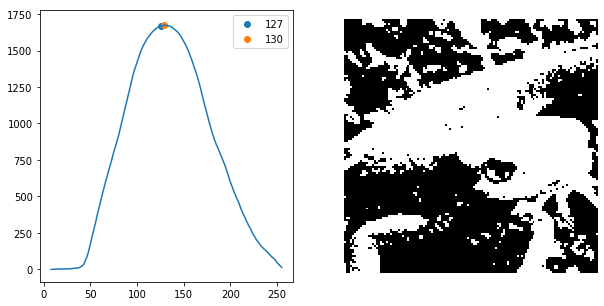

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np


def calc_sbsq(img_gray, thresh):
  g0 = img_gray[img_gray < thresh]
  g1 = img_gray[img_gray >= thresh]
  if len(g0) == 0 or len(g1) == 0:
    return 0
  w0 = len(g0)/(len(g0) + len(g1))
  w1 = len(g1)/(len(g0) + len(g1))
#   s0sq = np.var(g0)
#   s1sq = np.var(g1)
  m0 = np.mean(g0)
  m1 = np.mean(g1)
#   swsq = w0 * (s0sq ** 2) + w1 * (s1sq ** 2)
  sbsq = w0 * w1 * ((m0 - m1) ** 2)
#   stsq = swsq ** 2 + sbsq ** 2
  return sbsq

img_gray = cv2.imread("imori.jpg", 0)
min_pixel_val = img_gray.min() 
max_pixel_val = img_gray.max()
thresh = 0
max_sbsq = min_pixel_val - 100
list_sbsq = list()
for i in range(min_pixel_val, max_pixel_val+1):
  sbsq = calc_sbsq(img_gray, i)
  list_sbsq.append(sbsq)
  if sbsq > max_sbsq:
    thresh = i
    max_sbsq = sbsq
    
thresh, img_bin = cv2.threshold(img_gray,
                       thresh,
                       255,
                       cv2.THRESH_BINARY)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
y = list_sbsq
x = np.linspace(min_pixel_val, max_pixel_val, len(list_sbsq))
axes[0].plot(x, y)
axes[0].scatter(x[127 - min_pixel_val - 1], y[127 - min_pixel_val - 1], label="127")
axes[0].scatter(x[130 - min_pixel_val - 1], y[130 - min_pixel_val - 1], label="130")
axes[0].legend()
print(thresh)

axes[1].imshow(img_bin, cmap="gray")
axes[1].axis("off")
fig.show()

- 解答と誤差がある。これはgrayスケールで読み込むと整数値の配列になることに起因する。(本解答は元より情報量が落ちているということ)
- grayスケールを計算すると....

127.0


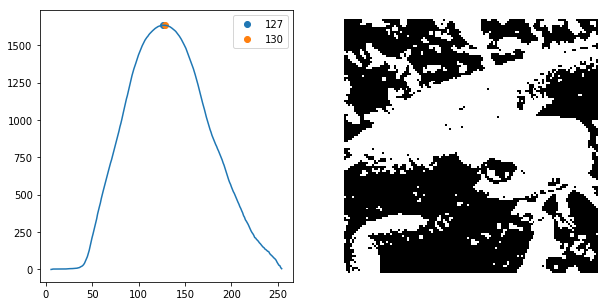

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np

def make_gray_img_self(img):
  b = img[:, :, 0].copy()
  g = img[:, :, 1].copy()
  r = img[:, :, 2].copy()

  y = 0.2126 * r + 0.7152 * g + 0.0722 * b
  return y

def calc_sbsq(img_gray, thresh):
  g0 = img_gray[img_gray < thresh]
  g1 = img_gray[img_gray >= thresh]
  if len(g0) == 0 or len(g1) == 0:
    return 0
  w0 = len(g0)/(len(g0) + len(g1))
  w1 = len(g1)/(len(g0) + len(g1))
#   s0sq = np.var(g0)
#   s1sq = np.var(g1)
  m0 = np.mean(g0)
  m1 = np.mean(g1)
#   swsq = w0 * (s0sq ** 2) + w1 * (s1sq ** 2)
  sbsq = w0 * w1 * ((m0 - m1) ** 2)
#   stsq = swsq ** 2 + sbsq ** 2
  return sbsq

img = cv2.imread("imori.jpg", 1)
img_gray = make_gray_img_self(img).astype(np.float)
min_pixel_val = int(img_gray.min())
max_pixel_val = int(img_gray.max())
thresh = 0
max_sbsq = min_pixel_val - 100
list_sbsq = list()
for i in range(min_pixel_val, max_pixel_val+1):
  sbsq = calc_sbsq(img_gray, i)
  list_sbsq.append(sbsq)
  if sbsq > max_sbsq:
    thresh = i
    max_sbsq = sbsq
    
thresh, img_bin = cv2.threshold(img_gray,
                       thresh,
                       255,
                       cv2.THRESH_BINARY)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
y = list_sbsq
x = np.linspace(min_pixel_val, max_pixel_val, len(list_sbsq))
axes[0].plot(x, y)
axes[0].scatter(x[127 - min_pixel_val - 1], y[127 - min_pixel_val - 1], label="127")
axes[0].scatter(x[130 - min_pixel_val - 1], y[130 - min_pixel_val - 1], label="130")
axes[0].legend()
print(thresh)

axes[1].imshow(img_bin, cmap="gray")
axes[1].axis("off")
fig.show()

129.0


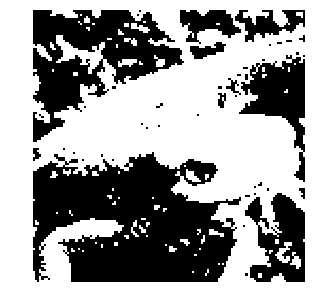

In [26]:
#モジュールを使用する場合
img = cv2.imread("imori.jpg", 0)
thresh,img_bin = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

print(thresh)
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.imshow(img_bin, cmap="gray")
ax.axis("off")
fig.show()

- やり方によって微妙に答えが違う…数値誤差なのかな

## 05. HSV変換
HSV変換を実装して、色相Hを反転せよ。

HSV変換とは、Hue(色相)、Saturation(彩度)、Value(明度) で色を表現する手法である。

- Hue ... 色合いを0~360度で表現し、赤や青など色の種類を示す。 ( 0 <= H < 360) 色相は次の色に対応する。

  ```
  赤 黄色  緑  水色  青  紫   赤
  0  60　　120 180　 240 300  360 
  ```
- Saturation ... 色の鮮やかさ。Saturationが低いと灰色さが顕著になり、くすんだ色となる。 ( 0<= S < 1)
- Value ... 色の明るさ。Valueが高いほど白に近く、Valueが低いほど黒に近くなる。 ( 0 <= V < 1)
RGB -> HSV変換は以下の式で定義される。

R,G,Bが[0, 1]の範囲にあるとする。
```
Max = max(R,G,B)
Min = min(R,G,B)

H =  { 0                            (if Min=Max)
       60 x (G-R) / (Max-Min) + 60  (if Min=B)
       60 x (B-G) / (Max-Min) + 180 (if Min=R)
       60 x (R-B) / (Max-Min) + 300 (if Min=G)
       
V = Max

S = Max - Min
HSV -> RGB変換は以下の式で定義される。

C = S

H' = H / 60

X = C (1 - |H' mod 2 - 1|)

(R,G,B) = (V - C) (1,1,1) + { (0, 0, 0)  (if H is undefined)
                              (C, X, 0)  (if 0 <= H' < 1)
                              (X, C, 0)  (if 1 <= H' < 2)
                              (0, C, X)  (if 2 <= H' < 3)
                              (0, X, C)  (if 3 <= H' < 4)
                              (X, 0, C)  (if 4 <= H' < 5)
                              (C, 0, X)  (if 5 <= H' < 6)
 ```
ここでは色相Hを反転(180を加算)し、RGBに直し画像を表示せよ

In [0]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

#bgr値の抽出
img = cv2.imread("imori.jpg").astype(np.float32)/255.
min_img = np.min(img, axis=2).copy()
max_img = np.max(img, axis=2).copy()
min_img_arg = np.argmin(img, axis=2)

#hを反転する
h = np.zeros_like(min_img)
h[np.where(min_img == max_img)] = 0
list_val = [60, 300, 180]
for i in range(3):
  ind = np.where(min_img_arg == i)
  h[ind] = 60 * (img[..., (i+1)%3][ind] - img[..., (i+2)%3][ind]) / (max_img[ind] - min_img[ind]) + list_val[i]
h = (h + 180) % 360

v = max_img.copy()
s = max_img.copy() - min_img.copy()


In [0]:
C = s
V = v
h_prime = h / 60
X = C * (1 - np.abs( h_prime % 2 - 1))
Z = np.zeros_like(h)

vals = [[Z,X,C], [Z,C,X], [X,C,Z], [C,X,Z], [C,Z,X], [X,Z,C]]

out = np.zeros_like(img)
for i in range(6):
    ind = np.where((i <= h_prime) & (h_prime < (i+1)))
    out[..., 0][ind] = (V-C)[ind] + vals[i][0][ind]
    out[..., 1][ind] = (V-C)[ind] + vals[i][1][ind]
    out[..., 2][ind] = (V-C)[ind] + vals[i][2][ind]
  
out[np.where(max_img == min_img)] = 0
out = (out * 255).astype(np.uint8)

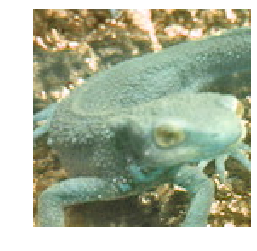

In [29]:
#cv2上だとBGRだがimshow(plt系)ではRGBの順である必要がある
plt.axis('off')
plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB)) 
plt.show()

##06. 減色処理
ここでは画像の値を256^3から4^3、すなわちR,G,B in {32, 96, 160, 224}の各4値に減色せよ。 これは量子化操作である。 各値に関して、以下の様に定義する。
```
val = {  32  (  0 <= val <  64)
         96  ( 64 <= val < 128)
        160  (128 <= val < 192)
        224  (192 <= val < 256)
```

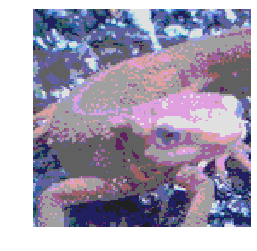

In [30]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("imori.jpg").astype(np.float32)
img = (img//64 * 2 + 1) * 32
img = img.astype(np.uint8)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

fig, ax = plt.subplots(1, 1)
ax.imshow(img)
ax.axis("off")
fig.show()

## 07. 平均プーリング
ここでは画像をグリッド分割(ある固定長の領域に分ける)し、かく領域内(セル)の平均値でその領域内の値を埋める。 このようにグリッド分割し、その領域内の代表値を求める操作はPooling(プーリング) と呼ばれる。 これらプーリング操作はCNN(Convolutional Neural Network) において重要な役割を持つ。

これは次式で定義される。

v = 1/|R| * Sum_{i in R} v_i

ここではimori.jpgは128x128なので、8x8にグリッド分割し、平均プーリングせよ。

(128, 128, 3)


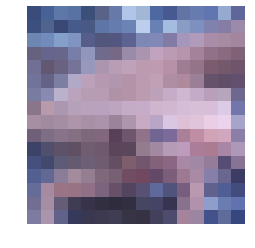

In [31]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2

img = cv2.imread("imori.jpg").astype(np.uint8)
print(img.shape)

g = 8
h, w, c = img.shape

h_new = h//8
w_new = w//8
result = np.zeros((h_new, w_new, c))
for j in range(h_new):
  y = g * j
  for i in range(w_new):
    x = g * i
    val = img[y:y+g, x:x+g, :].copy()
    out = np.mean(val, axis=0)    
    out = np.mean(out, axis=0)
    result[j, i, :] = out
result = result.astype(np.uint8)
result = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
fig, ax = plt.subplots(1, 1)
ax.imshow(result)
ax.axis("off")
fig.show()

In [32]:
a = np.array([1, 2, 3])
b = a.copy() * 3
c = np.stack([a, b])
print(c)
np.mean(c, axis=0)

[[1 2 3]
 [3 6 9]]


array([2., 4., 6.])

## 08. Maxプーリング
ここでは平均値でなく最大値でプーリングせよ。

(128, 128, 3)


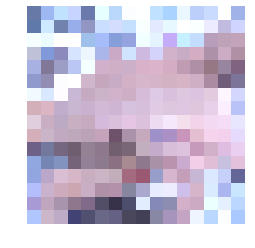

In [33]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2

img = cv2.imread("imori.jpg").astype(np.uint8)
print(img.shape)

g = 8
h, w, c = img.shape

h_new = h//8
w_new = w//8
result = np.zeros((h_new, w_new, c))
for j in range(h_new):
  y = g * j
  for i in range(w_new):
    x = g * i
    val = img[y:y+g, x:x+g, :].copy()
    out = np.max(val, axis=0)    
    out = np.max(out, axis=0)
    result[j, i, :] = out
result = result.astype(np.uint8)
result = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
fig, ax = plt.subplots(1, 1)
ax.imshow(result)
ax.axis("off")
fig.show()

In [34]:
a = np.array([1, 2, 3])
b = np.array([5, 0, 8])
c = np.stack([a, b])
print(c)
np.max(c, axis=0)

[[1 2 3]
 [5 0 8]]


array([5, 2, 8])

## 09. ガウシアンフィルタ
ガウシアンフィルタ(3x3、標準偏差1.3)を実装し、imori_noise.jpgのノイズを除去せよ。

ガウシアンフィルタとは画像の平滑化（滑らかにする）を行うフィルタの一種であり、ノイズ除去にも使われる。

ノイズ除去には他にも、メディアンフィルタ(Q.10)、平滑化フィルタ(Q.11)、LoGフィルタ(Q.19)などがある。

ガウシアンフィルタは注目画素の周辺画素を、ガウス分布による重み付けで平滑化し、次式で定義される。 このような重みはカーネルやフィルタと呼ばれる。

ただし、画像の端はこのままではフィルタリングできないため、画素が足りない部分は0で埋める。これを0パディングと呼ぶ。 かつ、重みは正規化する。(sum g = 1)
```
重み g(x,y,s) = 1/ (s*sqrt(2 * pi)) * exp( - (x^2 + y^2) / (2*s^2))
標準偏差s = 1.3による8近傍ガウシアンフィルタは
            1 2 1
K =  1/16 [ 2 4 2 ]
            1 2 1
```

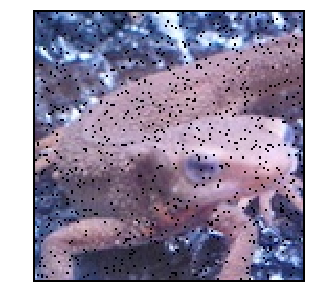

In [90]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2


def zero_padding(img, K):
  fil_height, fil_width = K.shape
  img_height, img_width, channel = img.shape
  zero_height = (fil_height - 1)//2
  zero_width = (fil_width - 1)//2
  array_zeros =  np.zeros((1, img_width, 3))
  for i in range(zero_height):
    img = np.vstack([array_zeros, img, array_zeros])
  img_height, img_width, channel = img.shape
  array_zeros = np.zeros((img_height, 1, 3))
  for i in range(zero_width):
    img = np.hstack([array_zeros, img, array_zeros]) 
  return img

img = cv2.imread("imori_noise.jpg")
img_padded = zero_padding(img, K)
out = img_padded.copy()
out = out.astype(np.uint8)
out = cv2.cvtColor(out, cv2.COLOR_BGR2RGB)
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.imshow(out)
ax.axis("off")
fig.show()

[[0.0625 0.125  0.0625]
 [0.125  0.25   0.125 ]
 [0.0625 0.125  0.0625]]
(128, 128, 3)


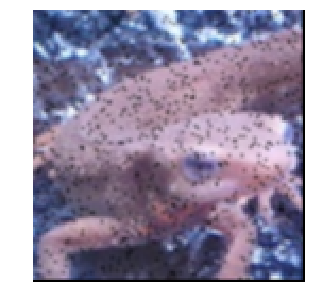

In [112]:
K = [[1, 2, 1], [2, 4, 2], [1, 2, 1]]
K = np.array(K).astype(np.float32)
K_total = np.sum(K)
K = K / K_total
print(K)

img2 = out.copy()

height, width, channel = img2.shape
K_height, K_width = K.shape
repeat_height = height - K_height + 1
repeat_width = width - K_width + 1
out2 = np.zeros_like(img2)
for j in range(repeat_height):
  for i in range(repeat_width):
    for c in range(channel):
      target_mat = img2[j: j+K_height, i: i+K_width, c]
      num = target_mat * K
      out2[j, i, c] = np.sum(num)
out2 = out2[1:-1, 1:-1, :]
print(out2.shape)
out2 = out2.astype(np.uint8)
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.imshow(out2)
ax.axis("off")
fig.show()